<a href="https://colab.research.google.com/github/mvdantas/Data-Science/blob/master/dol%20IbovC%C3%B3pia_de_investimentos_codigo_quant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns

!pip install yfinance --upgrade  --no-cache-dir
import yfinance as yf
yf.pdr_override()

     |████████████████████████████████| 6.3 MB 7.5 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=74ba0bfc4135ed53cdfa48859770c3acadf099d1ef8766c12acc00442ce5d933
  Stored in directory: /tmp/pip-ephem-wheel-cache-fx_z9ggv/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
ibov = web.get_data_yahoo('^BVSP', start = '2010-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
ibov.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-13,114300.0,117046.0,114300.0,116404.0,116404.0,9253400
2021-09-14,116405.0,117270.0,115809.0,116181.0,116181.0,9034100
2021-09-15,116191.0,116312.0,114741.0,115063.0,115063.0,9456800
2021-09-16,115062.0,115062.0,113395.0,113794.0,113794.0,10685500
2021-09-17,113794.0,113794.0,111157.0,111439.0,111439.0,14827600


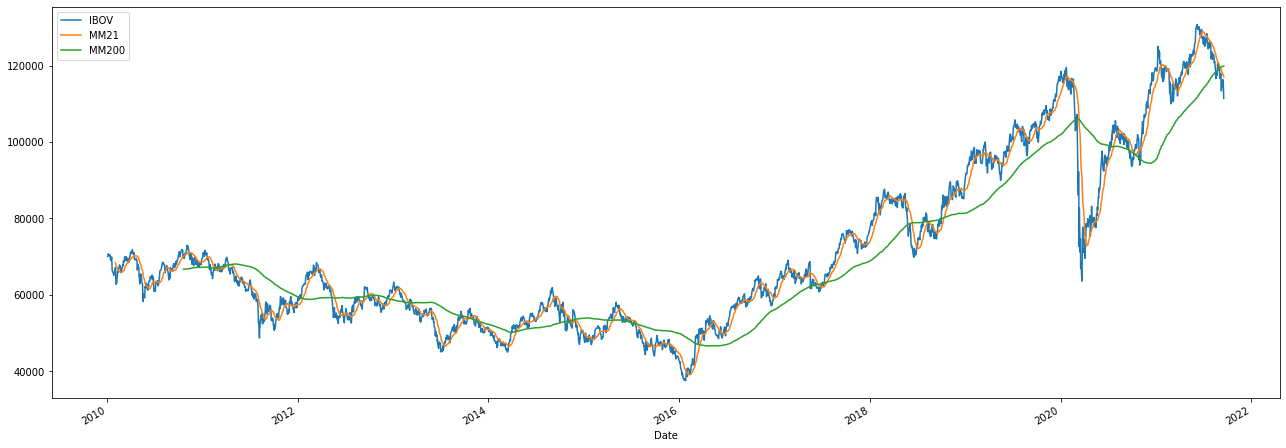

In [ ]:
ibov["Adj Close"].plot(figsize=(22,8), label = "IBOV")
ibov["Adj Close"].rolling(21).mean().plot(label="MM21")
ibov["Adj Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

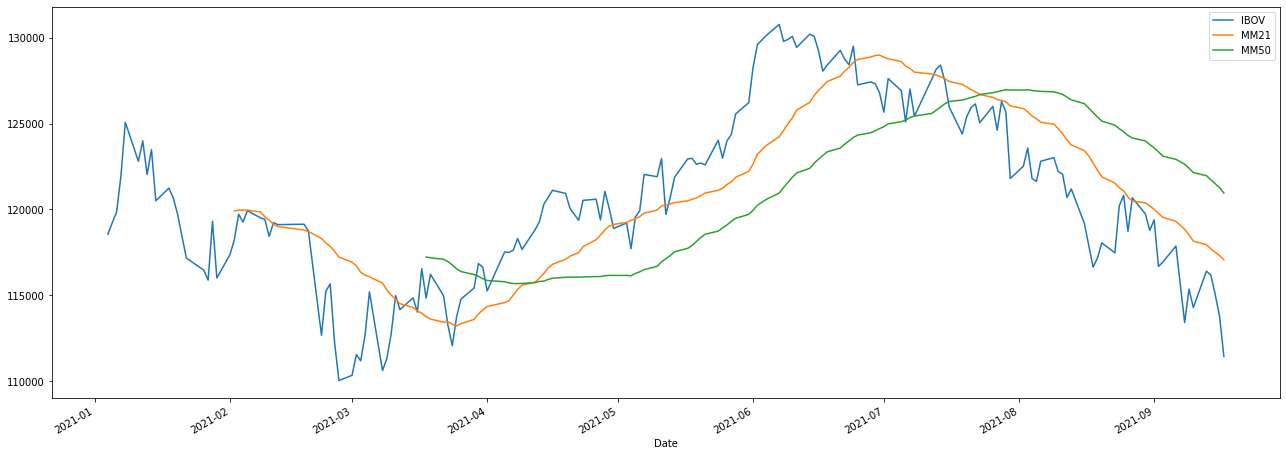

In [ ]:
ibov_fatiado = ibov[ibov.index.year == 2021]
ibov_fatiado["Adj Close"].plot(figsize=(22,8), label = "IBOV")
ibov_fatiado["Adj Close"].rolling(21).mean().plot(label="MM21")
ibov_fatiado["Adj Close"].rolling(50).mean().plot(label="MM50")
plt.legend()

In [ ]:
tickers = ["^BVSP", "USDBRL=X"]
carteira = web.get_data_yahoo(tickers, start = "2010-01-01")["Adj Close"]
carteira.tail()

[*********************100%***********************]  2 of 2 completed


,USDBRL=X,^BVSP
Date,,
2021-09-13,5.2470,116404.0
2021-09-14,5.2132,116181.0
2021-09-15,5.2389,115063.0
2021-09-16,5.2217,113794.0
2021-09-17,5.2568,111439.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f61939d9750>,
      dtype=object)

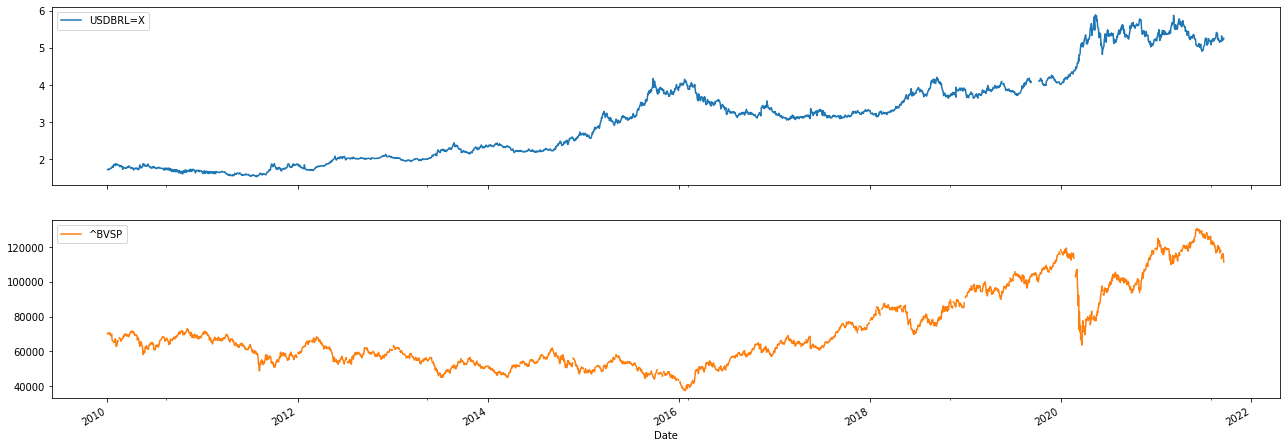

In [ ]:
carteira.plot(subplots = True, figsize=(22,8))

In [ ]:
carteira.isnull().sum()

USDBRL=X     27
^BVSP       162
dtype: int64

In [ ]:
carteira = carteira.dropna()
carteira.isnull().sum()

USDBRL=X    0
^BVSP       0
dtype: int64

In [ ]:
carteira.columns = ["Dolar","IBOV"]
carteira.tail()

,Dolar,IBOV
Date,,
2021-09-13,5.2470,116404.0
2021-09-14,5.2132,116181.0
2021-09-15,5.2389,115063.0
2021-09-16,5.2217,113794.0
2021-09-17,5.2568,111439.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f619366af90>,
      dtype=object)

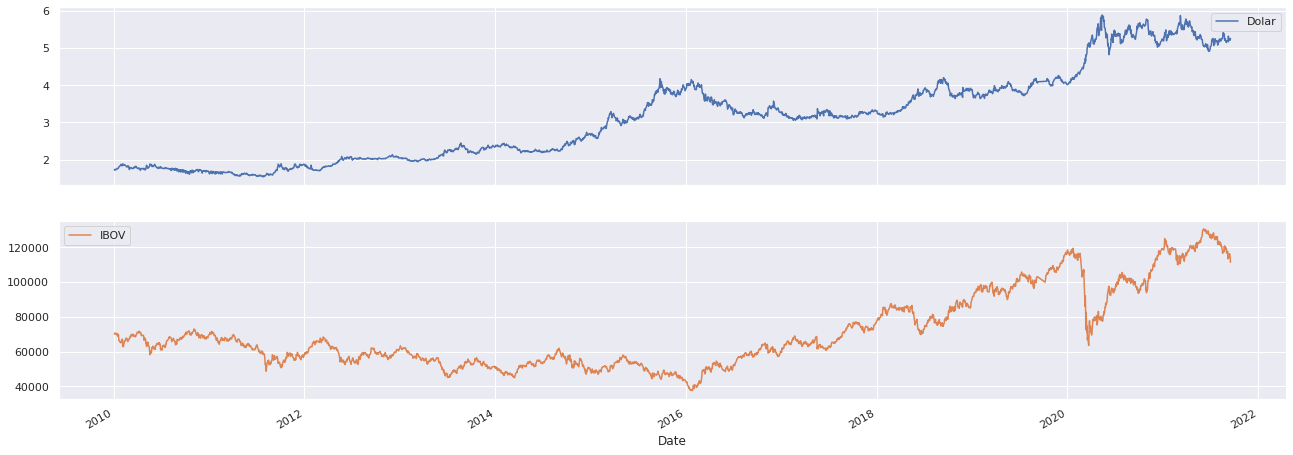

In [ ]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8))

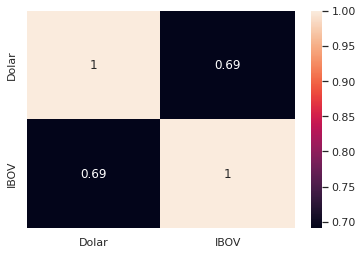

In [ ]:
sns.heatmap(carteira.corr(), annot=True)

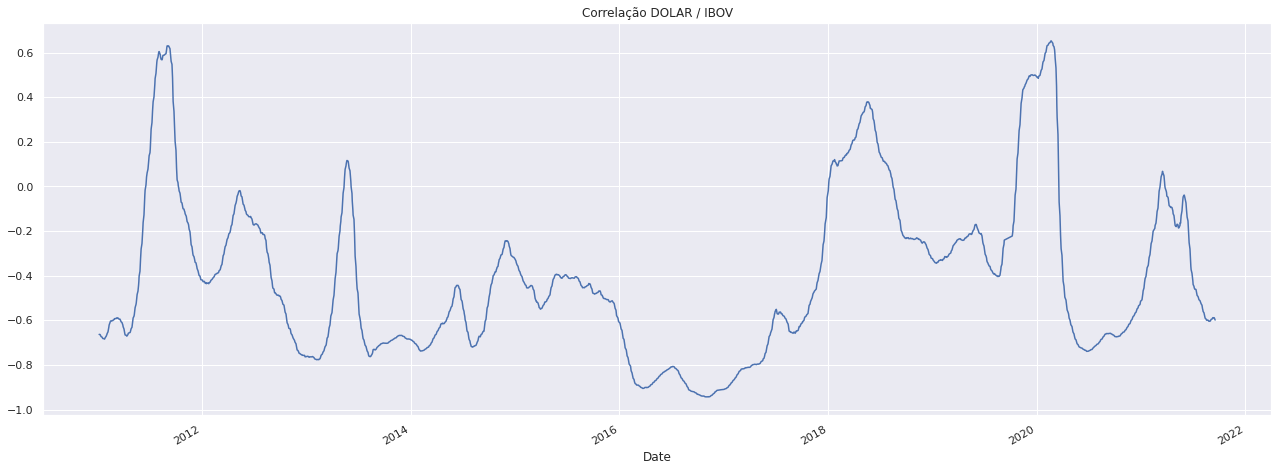

In [ ]:
carteira["Dolar"].rolling(252).corr(carteira["IBOV"]).plot(subplots=True, figsize=(22,8))
plt.title('Correlação DOLAR / IBOV')
plt.show()

In [ ]:
carteira["IBOV_DOLARIZADO"] = (carteira["IBOV"]/carteira["Dolar"])
carteira.tail()

,Dolar,IBOV,IBOV_DOLARIZADO
Date,,,
2021-09-13,5.2470,116404.0,22184.866624
2021-09-14,5.2132,116181.0,22285.927634
2021-09-15,5.2389,115063.0,21963.197607
2021-09-16,5.2217,113794.0,21792.518878
2021-09-17,5.2568,111439.0,21199.017710


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6186e03790>,
      dtype=object)

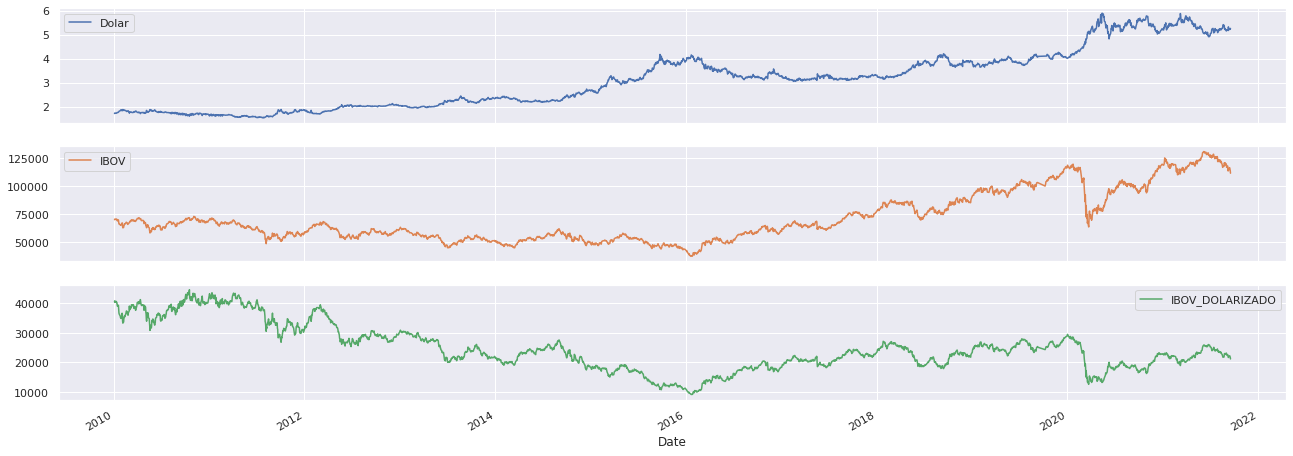

In [ ]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8))

In [ ]:
tickers = ["ITUB4.SA","VALE3.SA", "RRRP3.SA", "PETZ3.SA","YDUQ3.SA"]
carteira2 = web.get_data_yahoo(tickers, period="YTD")["Adj Close"]
ibov = web.get_data_yahoo("^BVSP", period = "YTD")["Adj Close"]

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
carteira2.tail()

,ITUB4.SA,PETZ3.SA,RRRP3.SA,VALE3.SA,YDUQ3.SA
Date,,,,,
2021-09-13,29.17,25.990000,35.459999,94.760002,25.120001
2021-09-14,28.99,27.000000,35.230000,94.089996,24.860001
2021-09-15,28.52,26.900000,36.130001,91.739998,24.980000
2021-09-16,28.50,26.799999,35.810001,87.930000,24.910000
2021-09-17,27.82,26.740000,34.230000,86.150002,24.440001


In [ ]:
ibov.tail()

Date
2021-09-13    116404.0
2021-09-14    116181.0
2021-09-15    115063.0
2021-09-16    113794.0
2021-09-17    111439.0
Name: Adj Close, dtype: float64

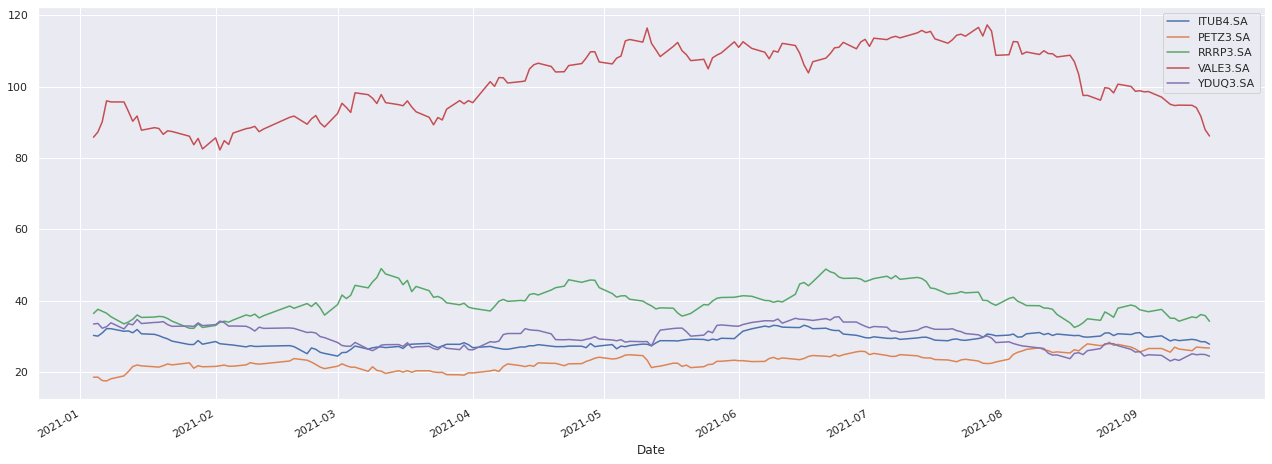

In [ ]:
carteira2.plot(figsize=(22,8))

In [ ]:
carteira2_normalizada = (carteira2 / carteira2.iloc[0])*10000
carteira2_normalizada

,ITUB4.SA,PETZ3.SA,RRRP3.SA,VALE3.SA,YDUQ3.SA
Date,,,,,
2021-01-04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
2021-01-05,9935.274732,10005.382261,10324.086875,10168.378666,10049.999481
2021-01-06,10226.536862,9494.079769,10175.775719,10501.858354,9650.001351
2021-01-07,10624.597857,9429.494689,10024.718526,11187.403496,9770.588738
2021-01-08,10621.359294,9757.803380,9752.814741,11152.415283,10102.940980
...,...,...,...,...,...
2021-09-13,9635.973531,13998.856770,9739.082459,11041.389622,7506.143072
2021-09-14,9576.512504,14542.867877,9675.913125,10963.320870,7428.452035
2021-09-15,9421.253644,14489.005198,9923.098385,10689.500185,7464.309086


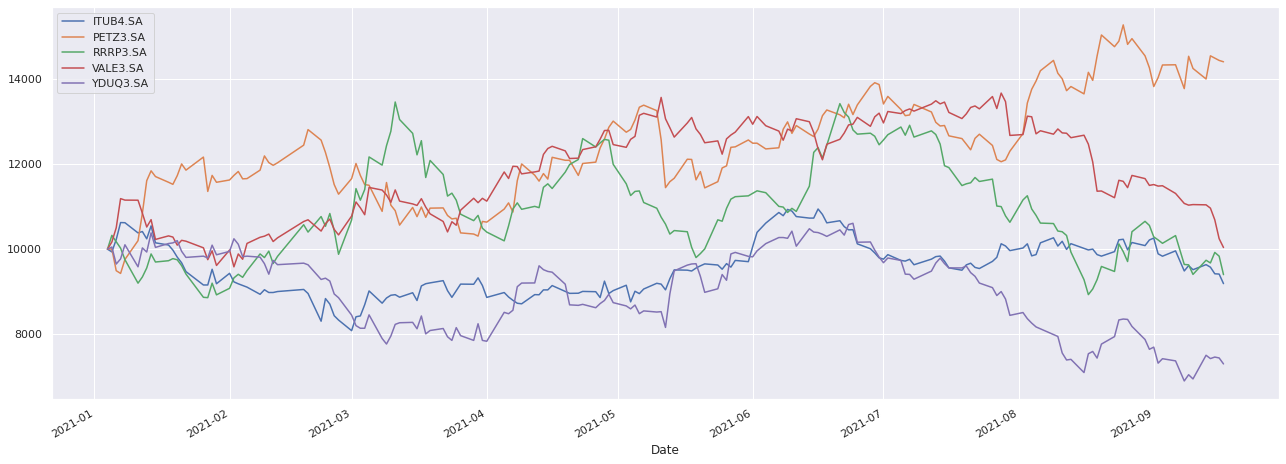

In [ ]:
carteira2_normalizada.plot(figsize=(22,8))

In [ ]:
carteira2_normalizada["Saldo"] = carteira2_normalizada.sum(axis=1)
carteira2_normalizada.tail()

,ITUB4.SA,PETZ3.SA,RRRP3.SA,VALE3.SA,YDUQ3.SA,Saldo
Date,,,,,,
2021-09-13,9635.973531,13998.856770,9739.082459,11041.389622,7506.143072,51921.445454
2021-09-14,9576.512504,14542.867877,9675.913125,10963.320870,7428.452035,52187.066411
2021-09-15,9421.253644,14489.005198,9923.098385,10689.500185,7464.309086,51987.166497
2021-09-16,9414.646723,14435.142519,9835.210526,10245.561112,7443.392378,51373.953257
2021-09-17,9190.016455,14402.825322,9401.263303,10038.156515,7302.951216,50335.212811


In [ ]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado

Date
2021-01-04    50000.000000
2021-01-05    50280.453449
2021-01-06    50545.302721
2021-01-07    51433.053864
2021-01-08    52749.287269
                  ...     
2021-09-13    49091.583866
2021-09-14    48997.537070
2021-09-15    48526.037889
2021-09-16    47990.856796
2021-09-17    46997.672026
Name: Adj Close, Length: 176, dtype: float64

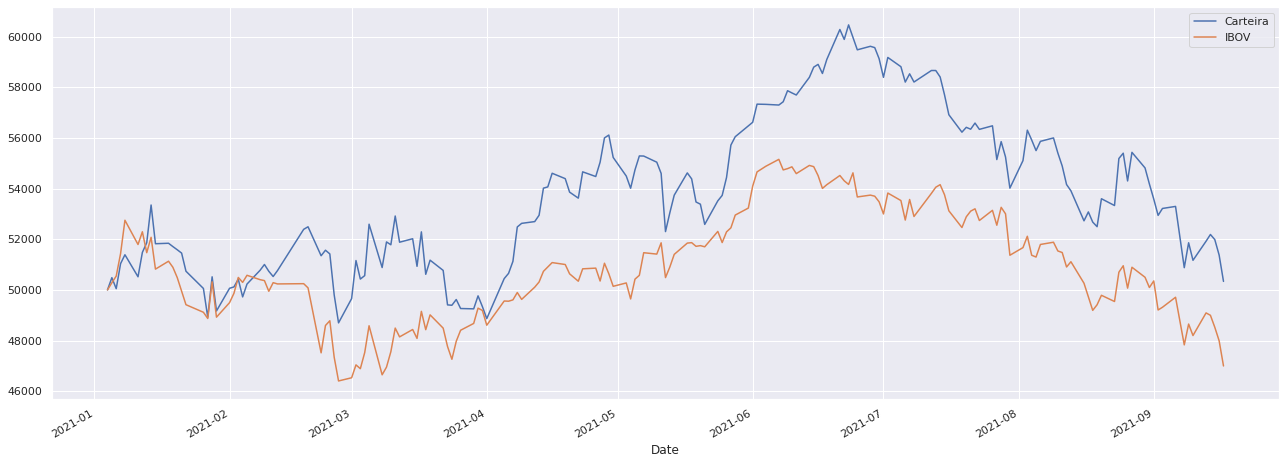

In [ ]:
carteira2_normalizada["Saldo"].plot(figsize=(22,8), label = "Carteira")
ibov_normalizado.plot(label="IBOV")
plt.legend()